In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:43<00:00, 24.1MB/s]
100% 2.29G/2.29G [01:43<00:00, 23.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/val',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds=test_ds.map(process)
#to get pixel value in 0 and 1.

In [7]:
#Now we have to make CNN model and we have to pass this dataset from this.
#Now we will make an architecture of 3 convolution layers. First layer will have 32
#filter, second layer will have 64 filters and third layer will have 128 filters.

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add (Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add (Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
163/163 [==============================] - 49s 209ms/step - loss: 0.7315 - accuracy: 0.9342 - val_loss: 53.6046 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 35s 206ms/step - loss: 0.1208 - accuracy: 0.9712 - val_loss: 39.9518 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 35s 206ms/step - loss: 0.0768 - accuracy: 0.9795 - val_loss: 18.3836 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 35s 206ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 9.5253 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 35s 200ms/step - loss: 0.0996 - accuracy: 0.9753 - val_loss: 2.1658 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 35s 207ms/step - loss: 0.0614 - accuracy: 0.9831 - val_loss: 0.1686 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 35s 199ms/step - loss: 0.1135 - accuracy: 0.9781 - val_loss: 4.0588 - val

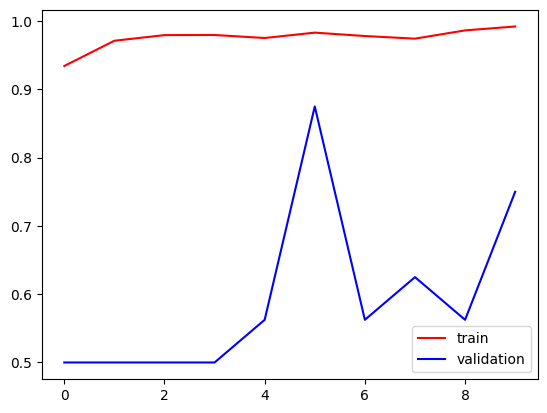

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

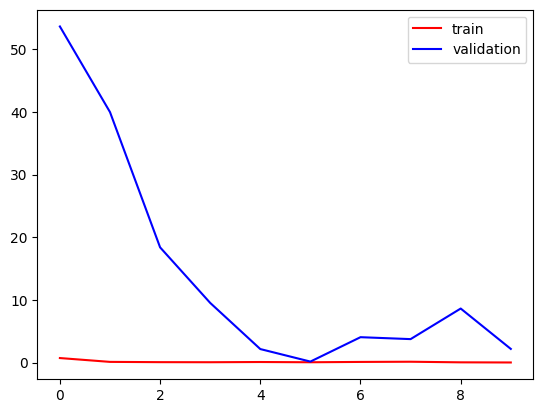

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
model.save_weights('kaggle/saved_model_ai/pneumoniadetection')